In [1]:
import numpy as np, matplotlib.pyplot as plt, mp2cal
from mp2cal.pos import tile_info

In [3]:
#Creat gain object, get raw calibration solutions and auto-correlations
freqs = np.linspace(1.67055e8,1.97735e8, 768)
f = []
for ii in range(768):
    if not ii%32 in [0,1,16,30,31]: f.append(ii)
mask = np.ones(768, dtype=bool)
mask[f] = False
gains = mp2cal.gain.RedGain(freqs=freqs, mask=mask)
cals = mp2cal.io.quick_load_gains('calibration_2016_10_22_pointing0.npz')
auto = mp2cal.io.quick_load_gains('autocorr_2016_10_22_pointing0.npz')
gains.sky = cals
gains.auto = auto

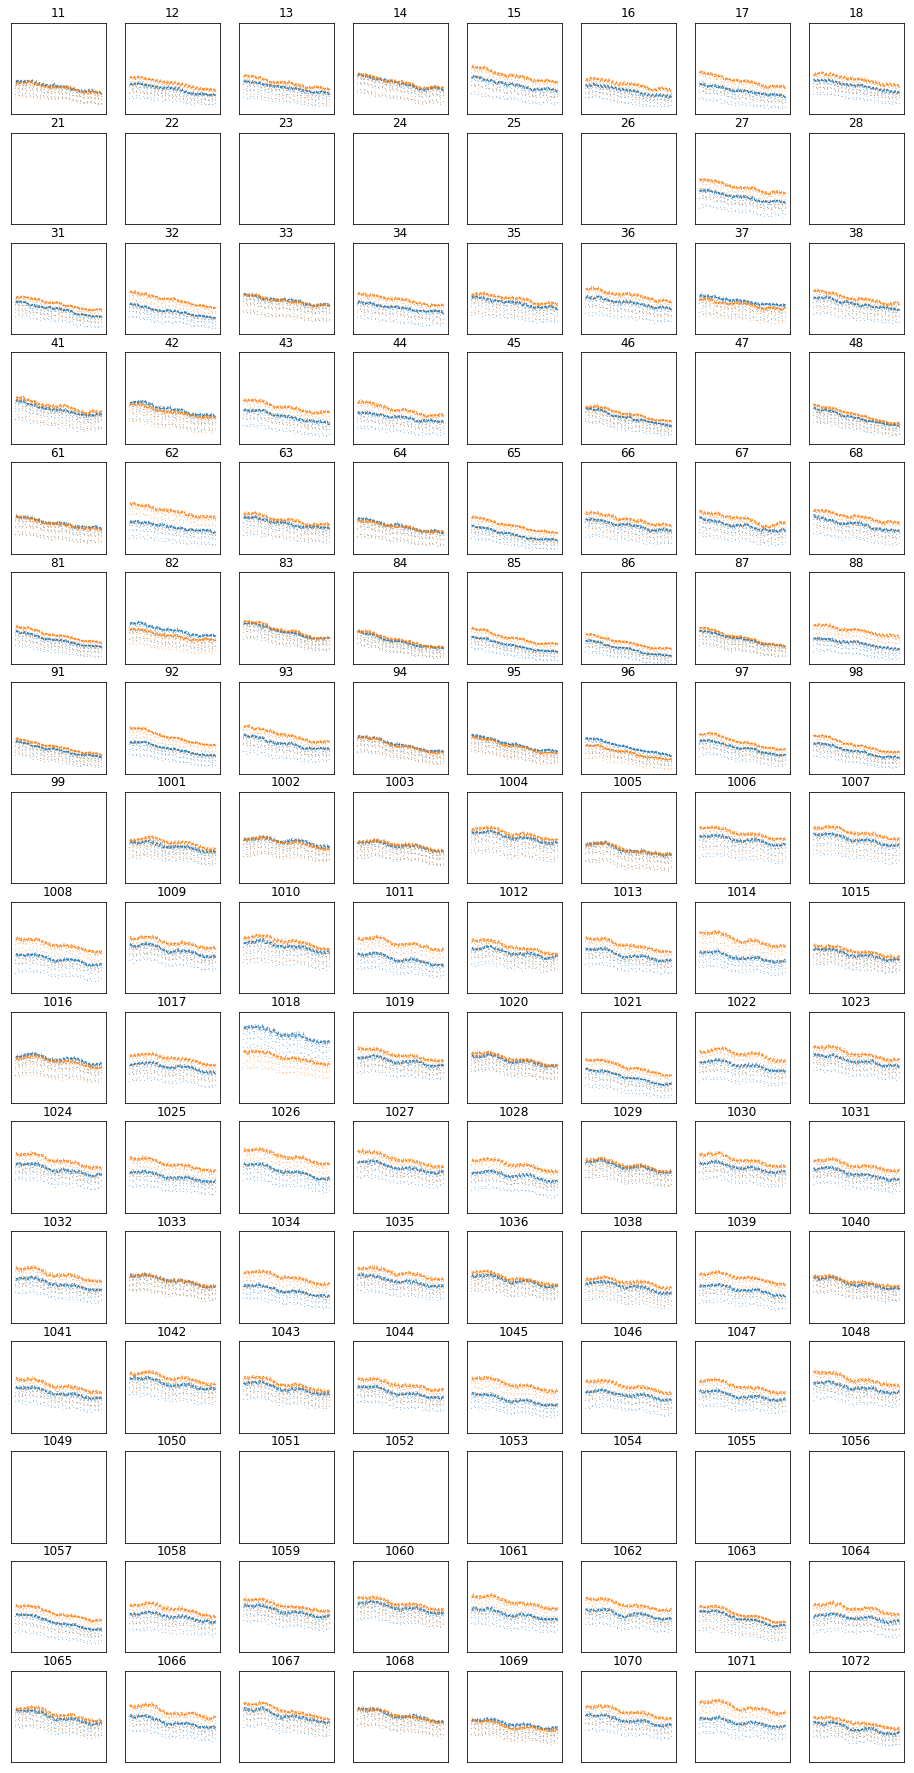

In [4]:
#Plot Gain Amplitudes vs frequency
fig = plt.figure(figsize=(16,32))
for ii in range(16):
    for jj in range(8):
        a = ii*8+jj
        p=fig.add_subplot(16,8,ii*8+jj+1)
        try:
            p.scatter(f,np.abs(gains.sky['x'][a][f]),s=0.02)
            p.scatter(f,np.abs(gains.sky['y'][a][f]),s=0.02)
        except: pass
        p.set_title(str(tile_info[a]['Tile']))
        p.set_ylim(1.0,3.5)
        p.set_xticks([])
        p.set_xticklabels([])
        p.set_yticks([])
        p.set_yticklabels([])
plt.show()

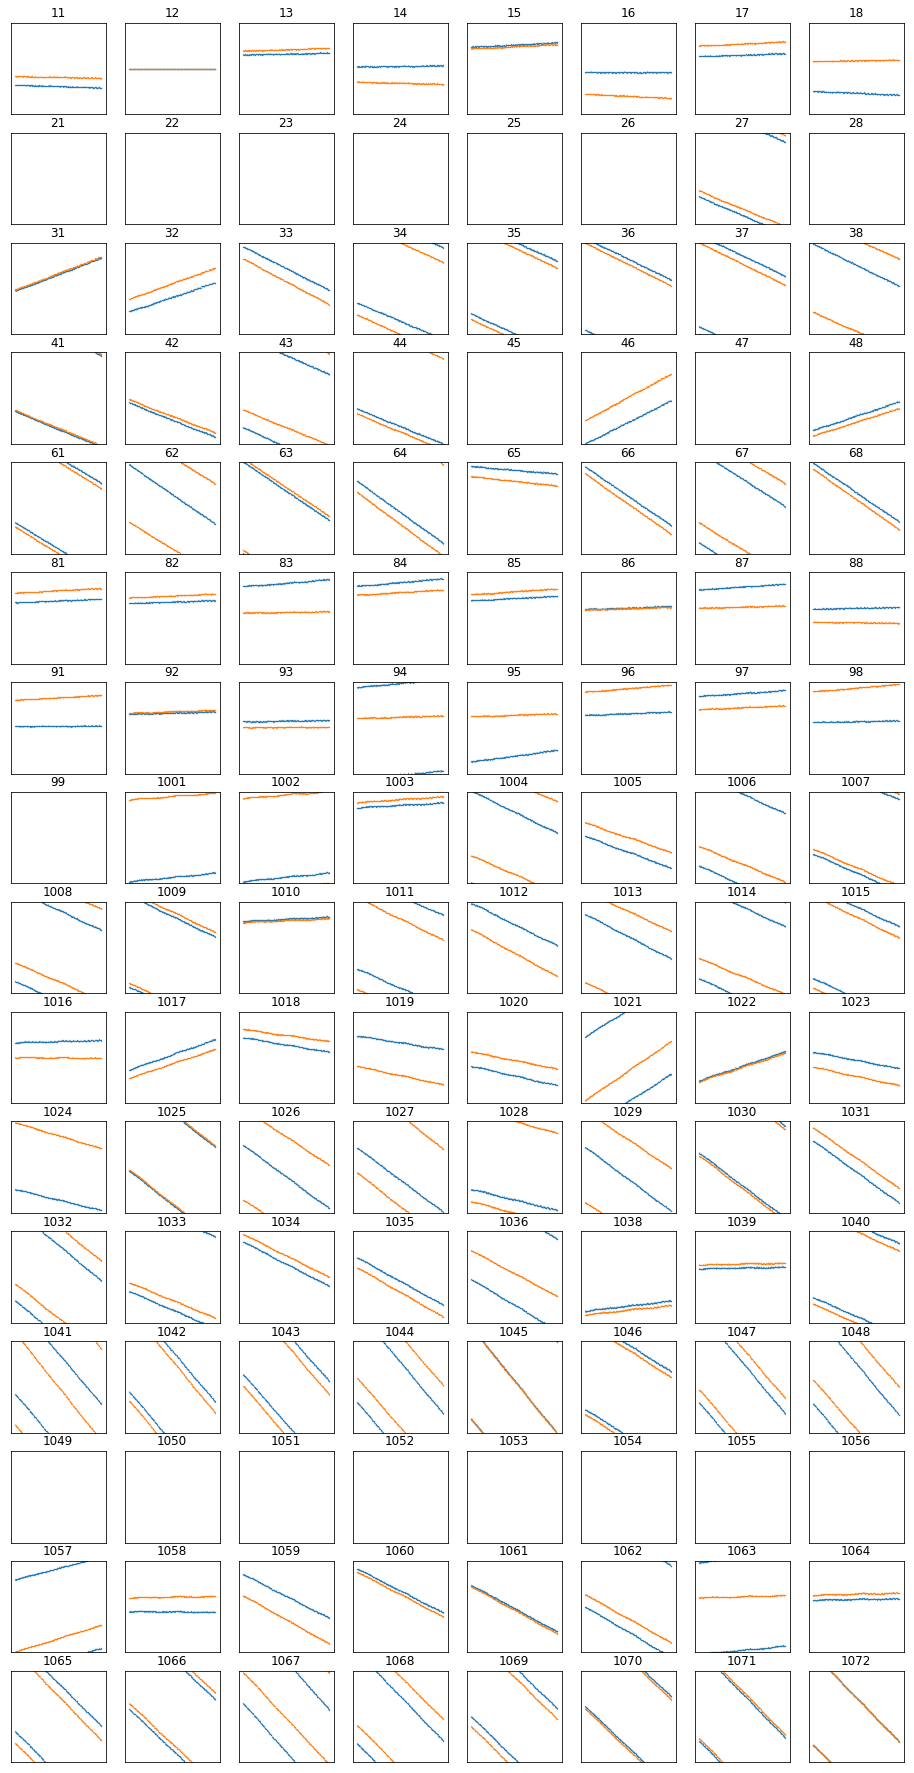

In [5]:
#Plot Gain Phases vs frequency
fig = plt.figure(figsize=(16,32))
for ii in range(16):
    for jj in range(8):
        a = ii*8+jj
        p=fig.add_subplot(16,8,ii*8+jj+1)
        try:
            p.scatter(f,np.angle(gains.sky['x'][a][f]),s=0.02)
            p.scatter(f,np.angle(gains.sky['y'][a][f]),s=0.02)
        except: pass
        p.set_title(str(tile_info[a]['Tile']))
        p.set_ylim(-np.pi,np.pi)
        p.set_xticks([])
        p.set_xticklabels([])
        p.set_yticks([])
        p.set_yticklabels([])
plt.show()

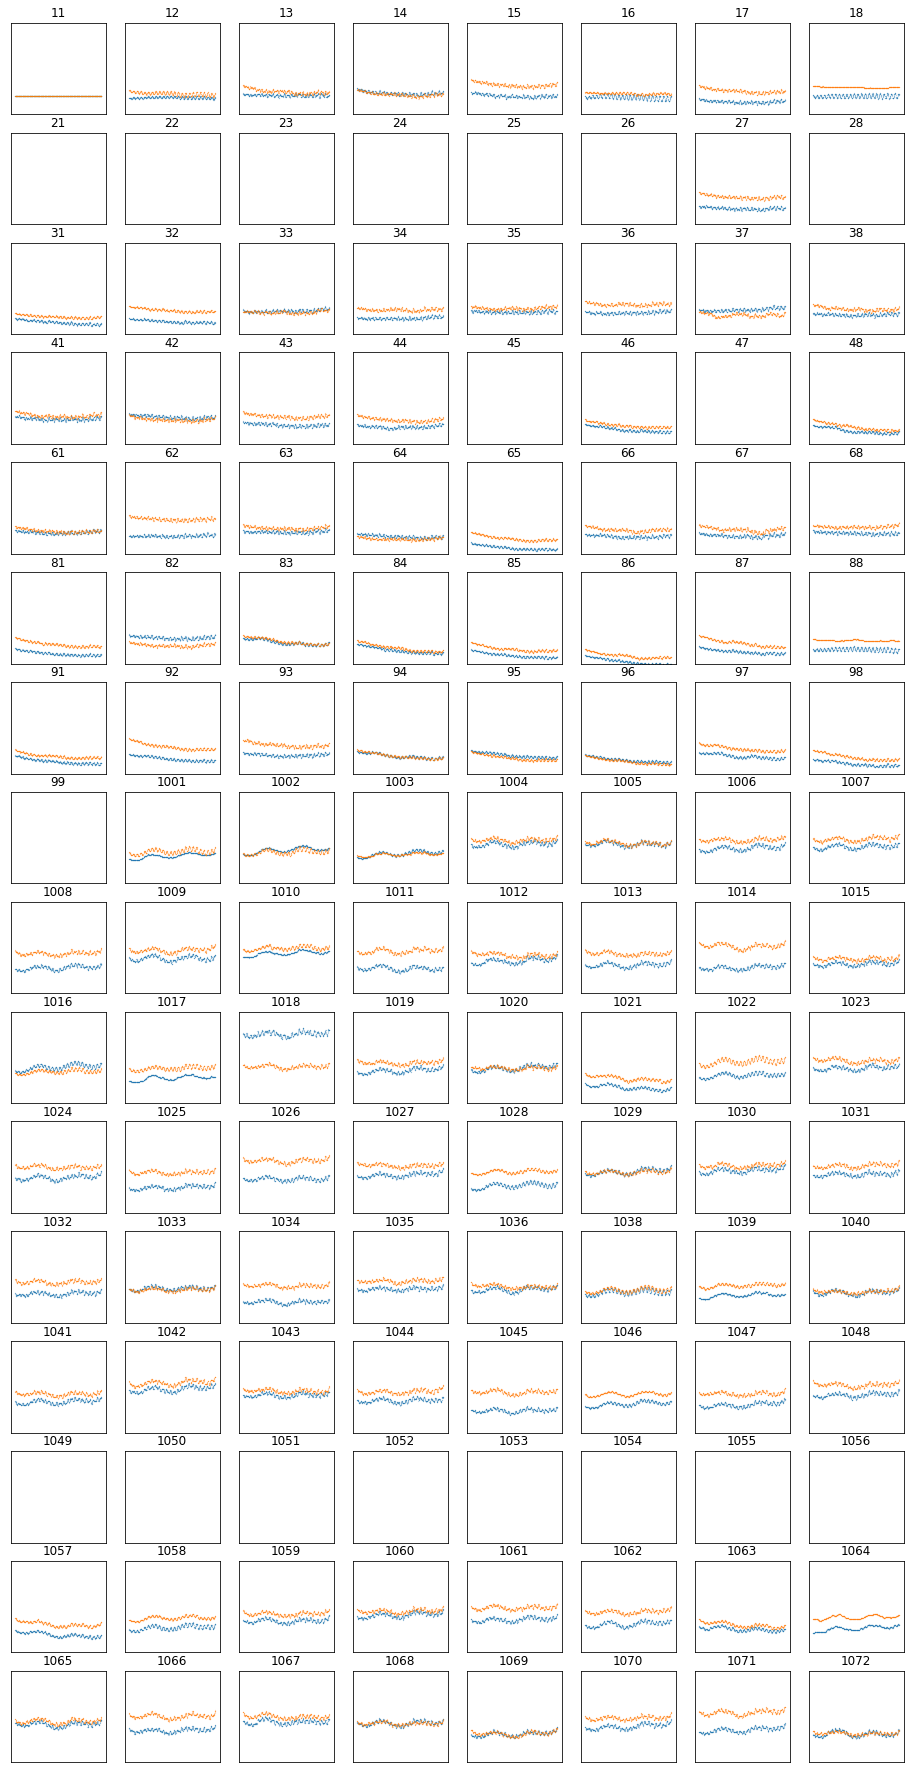

In [6]:
# Plot Scaled Auto-correlations vs frequency
fig = plt.figure(figsize=(16,32))
for ii in range(16):
    for jj in range(8):
        a = ii*8+jj
        p=fig.add_subplot(16,8,ii*8+jj+1)
        try:
            p.scatter(f,(gains.auto['x'][a][f]),s=0.01)
            p.scatter(f,(gains.auto['y'][a][f]),s=0.01)
        except: pass
        p.set_title(str(tile_info[a]['Tile']))
        p.set_ylim(0.8,1.8)
        p.set_xticks([])
        p.set_xticklabels([])
        p.set_yticks([])
        p.set_yticklabels([])
plt.show()

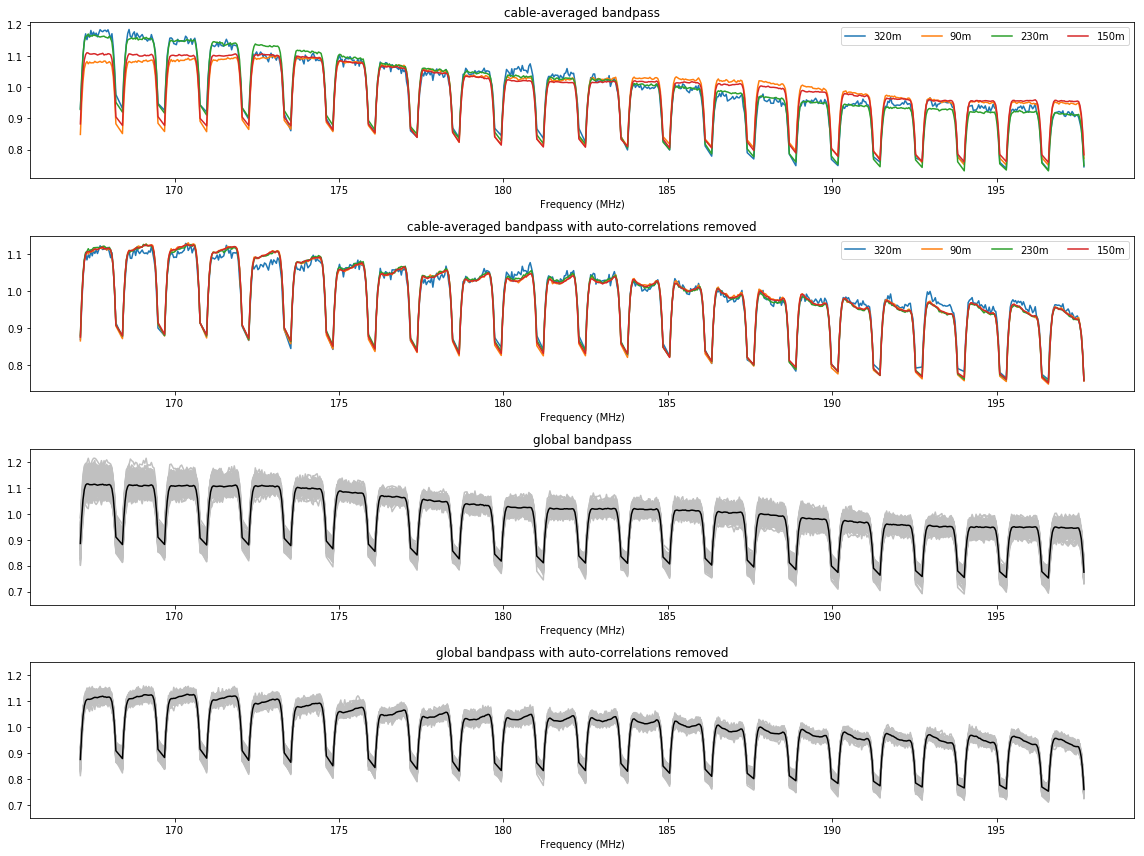

In [7]:
#Plot bandpass grouped in cable type and global bandpass in xx pol
fig = plt.figure(figsize=(16,12))
p1 = fig.add_subplot(4,1,1)
p2 = fig.add_subplot(4,1,2)
p3 = fig.add_subplot(4,1,3)
p4 = fig.add_subplot(4,1,4)
# fig.suptitle('XX')
bps = {}
rmauto = {}
global_bps = []
global_noauto = []
for a in gains.sky['x'].keys():
    c = tile_info[a]['cable']
    if not bps.has_key(c): 
        bps[c] = []
        rmauto[c] = []
    g = np.abs(gains.sky['x'][a])
    ind = np.where(g!=0)[0]
    bps[c].append(g/np.mean(g[ind]))
    global_bps.append(g/np.mean(g[ind]))
    g[ind] /= auto['x'][a][ind]
    rmauto[c].append(g/np.mean(g[ind]))
    global_noauto.append(g/np.mean(g[ind]))
    
def ave(arrlist):
    arr = np.array(arrlist)
    md = np.ma.masked_array(arr, np.zeros(arr.shape))
    md.mask[np.where(arr==0)] = True
    return np.mean(md, axis=0)

for c in bps.keys():
    p1.plot(freqs[f]/1e6, ave(bps[c])[f], label=str(c)+'m')
    p2.plot(freqs[f]/1e6, ave(rmauto[c])[f], label=str(c)+'m')
    for ii in range(len(bps[c])):
        p3.plot(freqs[f]/1e6, bps[c][ii][f], c='silver')
        p4.plot(freqs[f]/1e6, rmauto[c][ii][f], c='silver')
p3.plot(freqs[f]/1e6, ave(global_bps)[f],c='k')
p4.plot(freqs[f]/1e6, ave(global_noauto)[f],c='k')
p1.legend(ncol=4)
p2.legend(ncol=4)
p3.set_ylim(0.65,1.25)
p4.set_ylim(0.65,1.25)
p1.set_title('cable-averaged bandpass')
p2.set_title('cable-averaged bandpass with auto-correlations removed')
p3.set_title('global bandpass')
p4.set_title('global bandpass with auto-correlations removed')
p1.set_xlabel('Frequency (MHz)')
p2.set_xlabel('Frequency (MHz)')
p3.set_xlabel('Frequency (MHz)')
p4.set_xlabel('Frequency (MHz)')
plt.tight_layout()
plt.show()

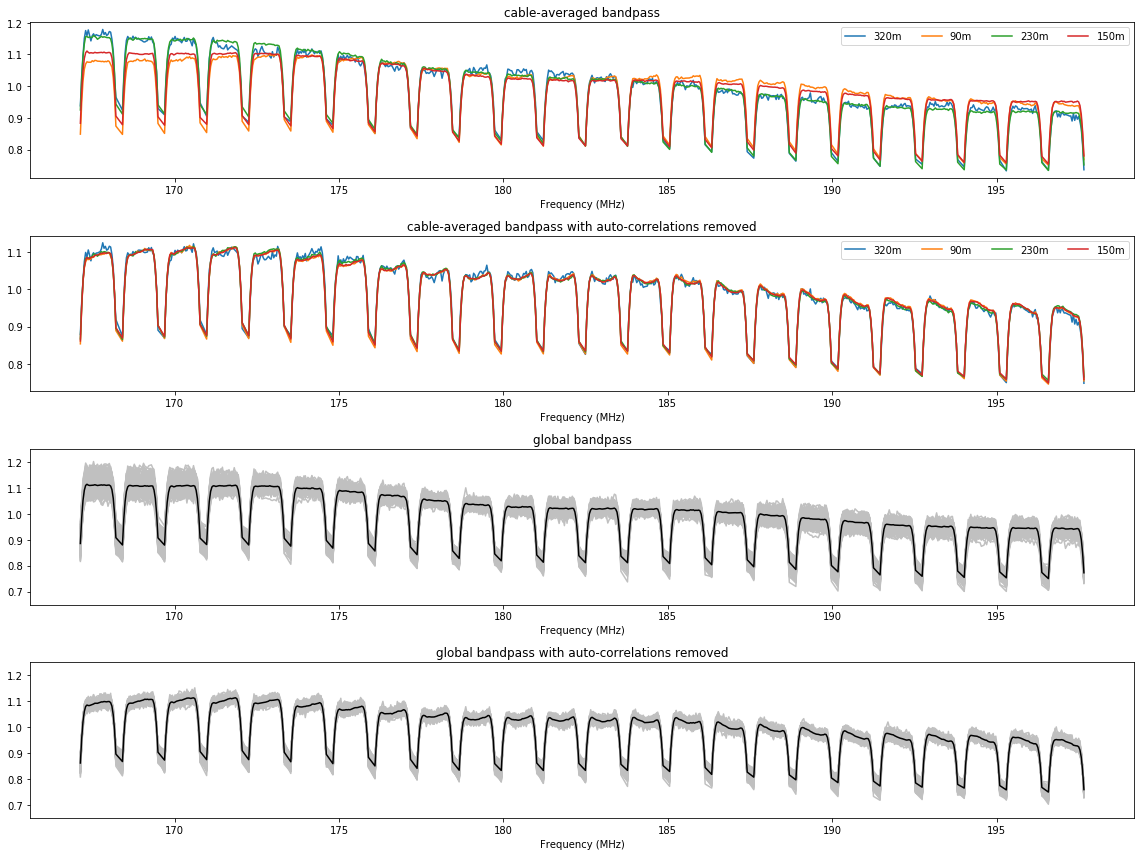

In [8]:
#Plot bandpass grouped in cable type and global bandpass in yy pol
fig = plt.figure(figsize=(16,12))
p1 = fig.add_subplot(4,1,1)
p2 = fig.add_subplot(4,1,2)
p3 = fig.add_subplot(4,1,3)
p4 = fig.add_subplot(4,1,4)
# fig.suptitle('XX')
bps = {}
rmauto = {}
global_bps = []
global_noauto = []
for a in gains.sky['y'].keys():
    c = tile_info[a]['cable']
    if not bps.has_key(c): 
        bps[c] = []
        rmauto[c] = []
    g = np.abs(gains.sky['y'][a])
    ind = np.where(g!=0)[0]
    bps[c].append(g/np.mean(g[ind]))
    global_bps.append(g/np.mean(g[ind]))
    g[ind] /= auto['y'][a][ind]
    rmauto[c].append(g/np.mean(g[ind]))
    global_noauto.append(g/np.mean(g[ind]))
    
def ave(arrlist):
    arr = np.array(arrlist)
    md = np.ma.masked_array(arr, np.zeros(arr.shape))
    md.mask[np.where(arr==0)] = True
    return np.mean(md, axis=0)

for c in bps.keys():
    p1.plot(freqs[f]/1e6, ave(bps[c])[f], label=str(c)+'m')
    p2.plot(freqs[f]/1e6, ave(rmauto[c])[f], label=str(c)+'m')
    for ii in range(len(bps[c])):
        p3.plot(freqs[f]/1e6, bps[c][ii][f], c='silver')
        p4.plot(freqs[f]/1e6, rmauto[c][ii][f], c='silver')
p3.plot(freqs[f]/1e6, ave(global_bps)[f],c='k')
p4.plot(freqs[f]/1e6, ave(global_noauto)[f],c='k')
p1.legend(ncol=4)
p2.legend(ncol=4)
p3.set_ylim(0.65,1.25)
p4.set_ylim(0.65,1.25)
p1.set_title('cable-averaged bandpass')
p2.set_title('cable-averaged bandpass with auto-correlations removed')
p3.set_title('global bandpass')
p4.set_title('global bandpass with auto-correlations removed')
p1.set_xlabel('Frequency (MHz)')
p2.set_xlabel('Frequency (MHz)')
p3.set_xlabel('Frequency (MHz)')
p4.set_xlabel('Frequency (MHz)')
plt.tight_layout()
plt.show()

In [9]:
#Do bandpass fitting: gain = auto(i,f)*gbp(f)*const(i)*exp(1j*(delay*f+offset+reflection(f)))
gains.bandpass_fitting(include_red=False) 
# Attention: If you have redundant calibration in hand, do gains.get_red(<redcal gains>). When you do
# bandpass fitting, turn include_red = True. In this example we only fit sky calibration.

//anaconda/lib/python2.7/site-packages/mp2cal/gain.py:406: RuntimeWarning: invalid value encountered in divide
  amps = self.auto[p][a] / self.auto[p][aa]


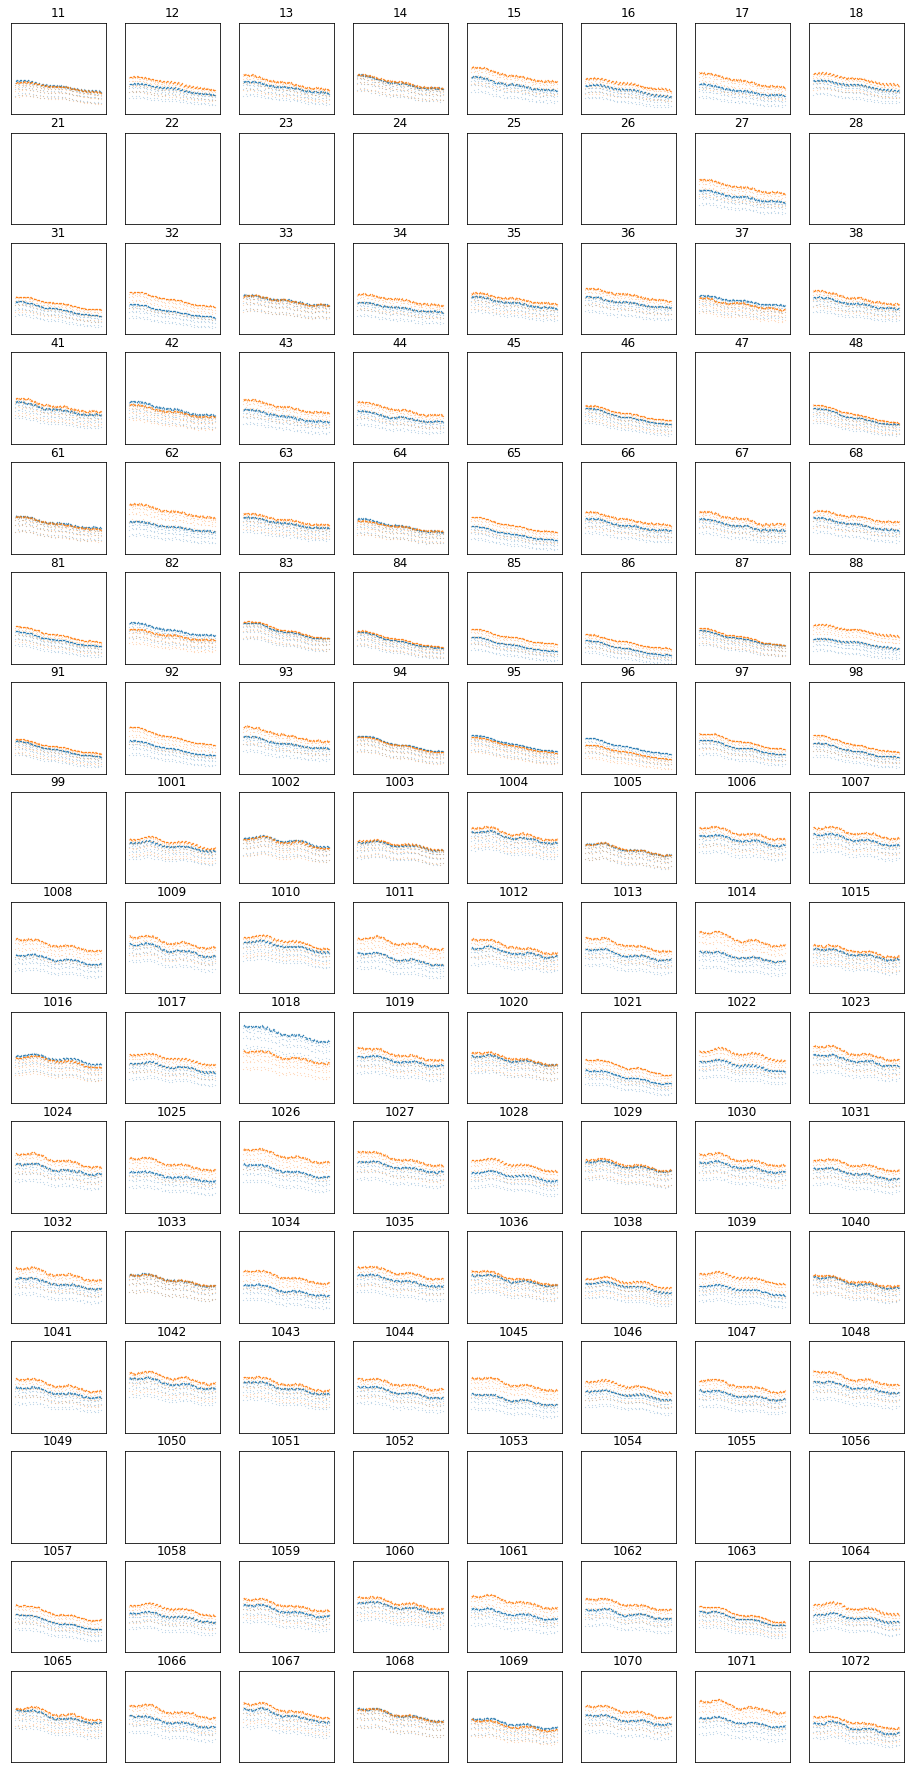

In [10]:
#Plot Fitted Gain Amplitudes vs frequency
fig = plt.figure(figsize=(16,32))
for ii in range(16):
    for jj in range(8):
        a = ii*8+jj
        p=fig.add_subplot(16,8,ii*8+jj+1)
        try:
            p.scatter(f,np.abs(gains.gfit['x'][a][f]),s=0.01)
            p.scatter(f,np.abs(gains.gfit['y'][a][f]),s=0.01)
        except: pass
        p.set_title(str(tile_info[a]['Tile']))
        p.set_ylim(1.0,3.5)
        p.set_xticks([])
        p.set_xticklabels([])
        p.set_yticks([])
        p.set_yticklabels([])
plt.show()

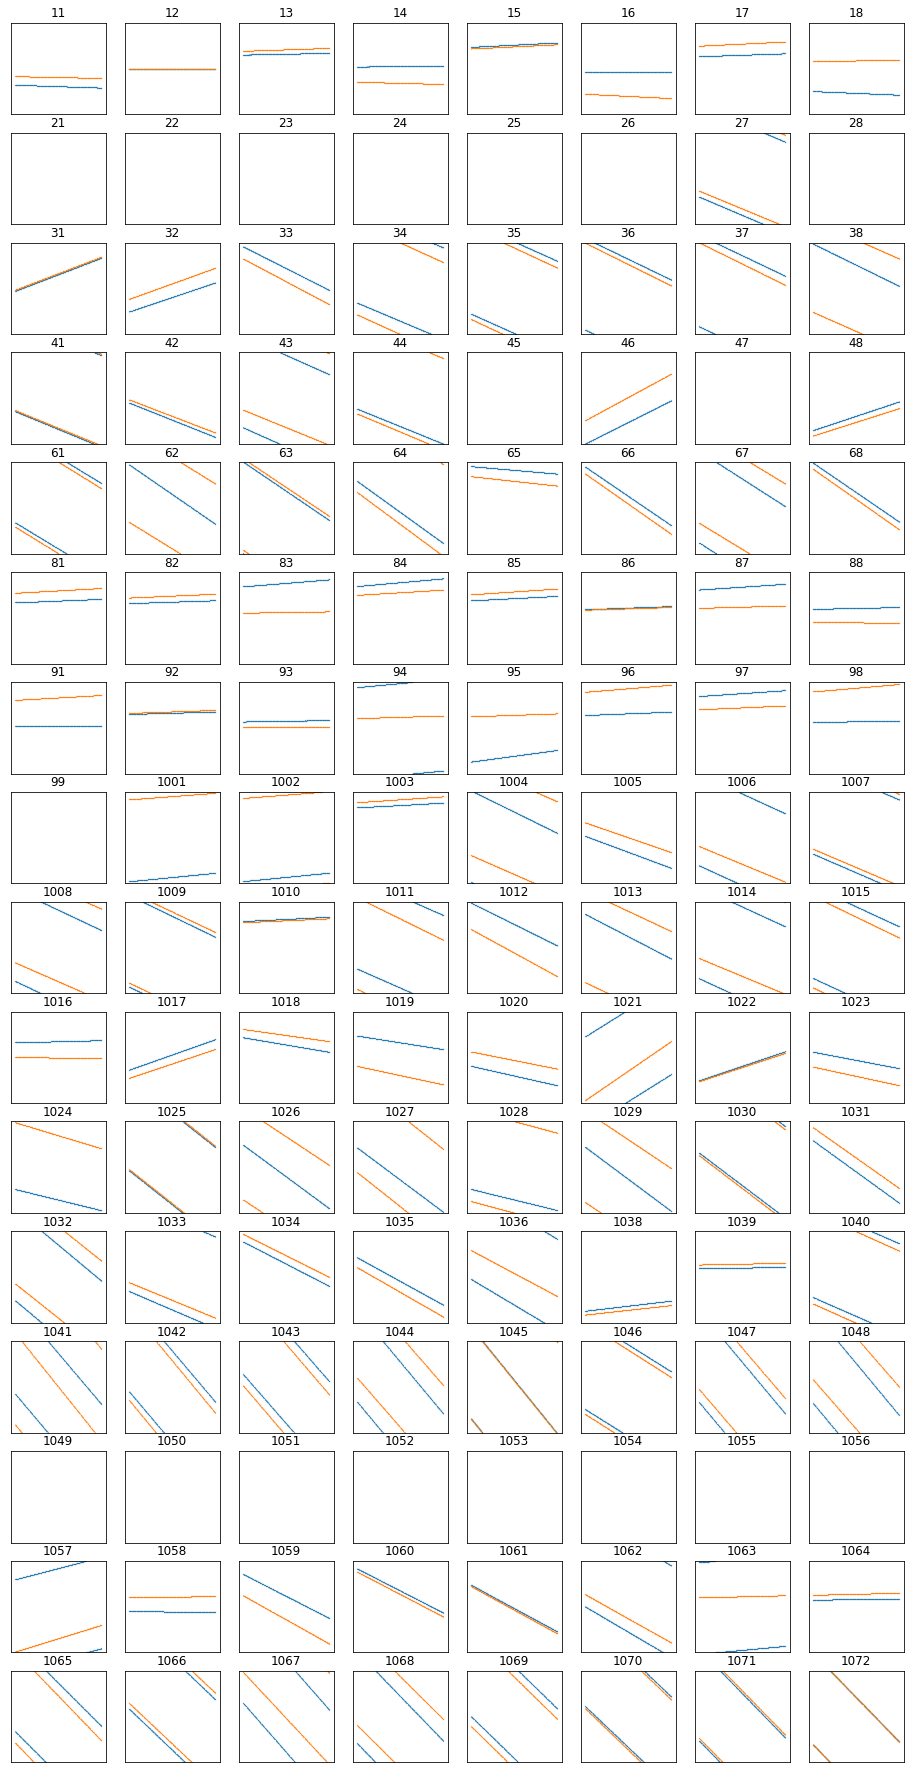

In [11]:
#Plot Fitted Gain Phases vs frequency
fig = plt.figure(figsize=(16,32))
for ii in range(16):
    for jj in range(8):
        a = ii*8+jj
        p=fig.add_subplot(16,8,ii*8+jj+1)
        try:
            p.scatter(f,np.angle(gains.gfit['x'][a][f]),s=0.01)
            p.scatter(f,np.angle(gains.gfit['y'][a][f]),s=0.01)
        except: pass
        p.set_title(str(tile_info[a]['Tile']))
        p.set_ylim(-np.pi,np.pi)
        p.set_xticks([])
        p.set_xticklabels([])
        p.set_yticks([])
        p.set_yticklabels([])
plt.show()